<h1 align="center"> Visualización de datos con Python</h1>
<h2 align="center"> Uso de librerías como Matplotlib, Seaborn y Altair 📊</h2>

**Objetivo**
- Hacer uso de tres librerías populares de Python para visualización de datos.

Librerías por revisar:
- Matplotlib
- Seaborn
- Altair
- Bokeh 🔜
- Plotly 🔜

### Datos para visualizar

Carpeta contenedora de datos para visualizar

In [1]:
# Realizar un cambio de ruta a la carpeta con csv's

import os 
print('Ruta inicial:\n', os.getcwd()) # Antes

# cambio a carpeta con csv's en local
os.chdir('E:\Desktop\prueba') 

print('Ruta final:\n', os.getcwd()) # Después

# Listar archivos en la carpeta contenedora de csv's
os.listdir()

Ruta inicial:
 C:\Users\LENOVO\Documents\GitHub-repos\Playing-with-colab\jupyter_notebooks
Ruta final:
 E:\Desktop\prueba


['ALTAMIZA.csv',
 'BARRIOS.csv',
 'BERNAL.csv',
 'CANCHAQUE.csv',
 'CHALACO.csv',
 'CHIGNIA.csv',
 'prueba.py']

In [2]:
import pandas as pd

est_ALTAMIZA = pd.read_csv('ALTAMIZA.csv')
est_ALTAMIZA = est_ALTAMIZA.iloc[:,3:].drop('UNIDADMEDIDA', axis=1)
est_ALTAMIZA.FECHA = pd.to_datetime(est_ALTAMIZA.FECHA)
est_ALTAMIZA.set_index('FECHA', inplace=True)
est_ALTAMIZA.head()

,VALOR
FECHA,
1972-12-01,0.0
1972-12-02,0.0
1972-12-03,0.0
1972-12-04,0.0
1972-12-05,4.1


### Visualización de datos: Matplotlib

Página oficial de [Matplotlib](https://matplotlib.org/)

- Es recomendable visitar [Introducción a Matplotlib](https://matplotlib.org/stable/tutorials/index.html#introductory), brindado en su página oficial para su mejor entendimiento.
- **Ojo**: Hay dos maneras de realizar gráficas con Matplotlib:
    - usando un enfoque orientado a objetos: De un objeto, usar sus métodos.
    - Usar pyplot: más simple y entendible

Para mayor información sobre las dos formas de uso, visitar: [The object-oriented interface and the pyplot interface](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface)

<p align='center'>
    <img src='https://matplotlib.org/stable/_images/anatomy.png' width=600/>
</p>

En esta libreta haré uso del estilo 'orientado a objetos'. En caso de iniciar con Matplotlib, recomiendo empezar con la forma `pyplot` y anexo su tutorial de la página oficial:
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

In [3]:
import matplotlib.pyplot as plt

Estructura para generar visualizaciones con Matplotlib

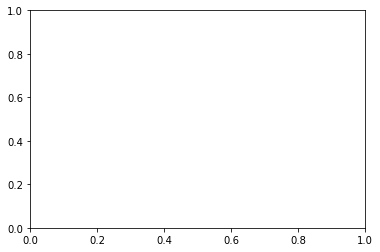

In [4]:
# Crear una figura y ejes con plt.subplots
fig, ax = plt.subplots()

# Llamar la función show() para presentar la gráfica
plt.show()

Es posible omitir la línea de código `plt.show()` reemplazandolo por un `;` (punto y coma) al final de tu expresión.
A continuación un ejemplo:
```
# Forma 1: Con plt.show()
ax.set(title='Estación Altamiza')
plt.show()

# Forma 2: Usando punto y coma
ax.set(title='Estación Altamiza');
```

Para plotear datos en los ejes X e Y, se puede realizar de dos formas:
- Cuando se quiere representar 2 columnas de datos: `ax.plot(df.datos_ejeX, df.datos_ejeY)`
- En caso de tener de índice una columna de fechas: `ax.plot(df.index, df.datos_ejeY)`

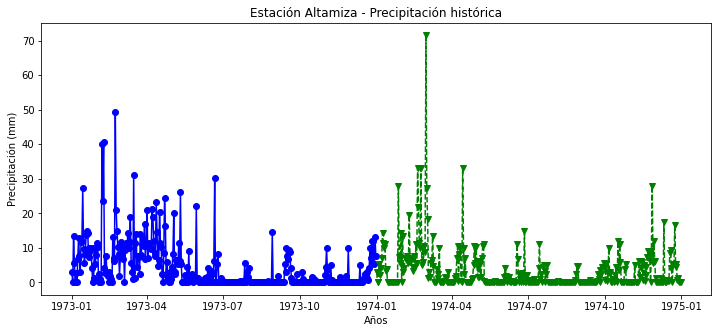

In [5]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(est_ALTAMIZA.loc['1973',['VALOR']],
       color='b',
       marker='o',
       linestyle='-')

ax.plot(est_ALTAMIZA.loc['1974',['VALOR']],
       color='g',
       marker='v',
       linestyle='--'); 

ax.set(title='Estación Altamiza - Precipitación histórica', 
       xlabel='Años', 
       ylabel='Precipitación (mm)');

Múltiples plots: `subplots()`

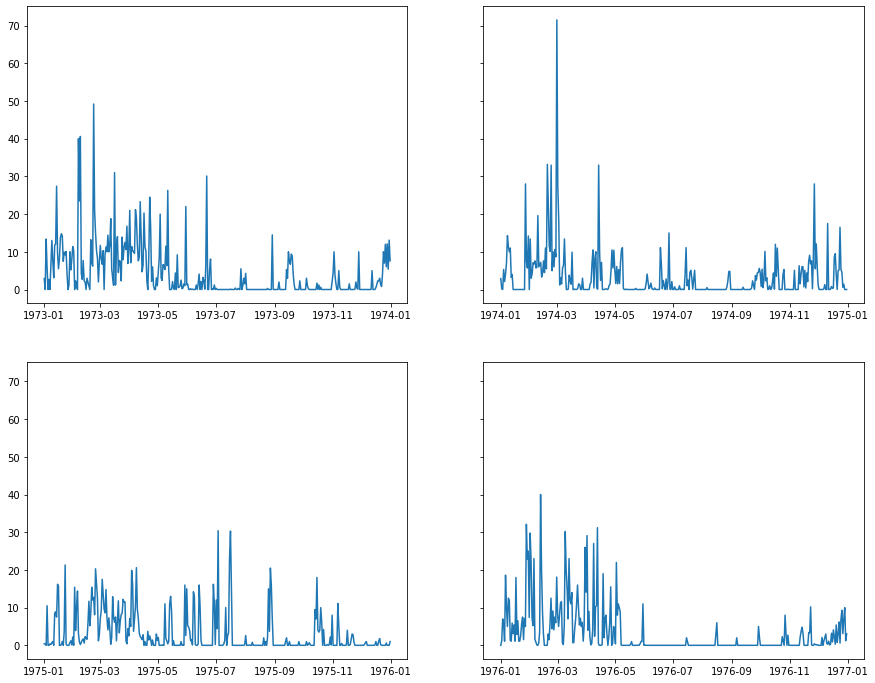

In [6]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(15,12), sharey=True)

# Addressing the top left Axes as index 0, 0
ax[0, 0].plot(est_ALTAMIZA.loc['1973',['VALOR']])

# In the top right (index 0,1)
ax[0, 1].plot(est_ALTAMIZA.loc['1974',['VALOR']])

# In the bottom left (1, 0)
ax[1, 0].plot(est_ALTAMIZA.loc['1975',['VALOR']])

# In the bottom right (1, 1) 
ax[1, 1].plot(est_ALTAMIZA.loc['1976',['VALOR']])

plt.show()

----

### Visualización de datos: Seaborn 🔜

Como menciona su página oficial, Seaborn es una librería de visualización estadística de datos. 
- Pandas + Matplotlib = [Seaborn](https://seaborn.pydata.org/)
- Para ver una introducción a Seaborn se recomienda visitar [An introduction to seaborn - Seaborn](https://seaborn.pydata.org/introduction.html)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


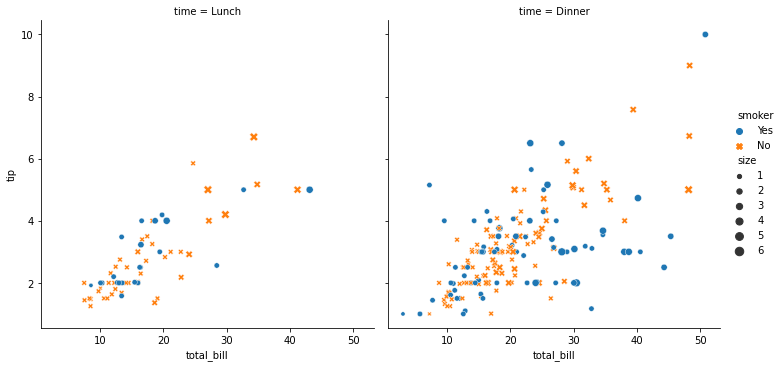

In [23]:
# Import seaborn
import seaborn as sns

# Apply the default theme
# sns.set_theme() # Generalmente no me agrada este estilo

# Load an example dataset
tips = sns.load_dataset("tips")
display(tips)
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
);

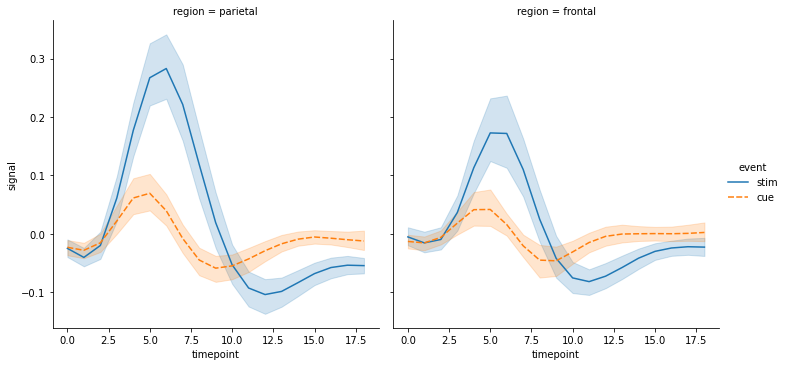

In [24]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
);

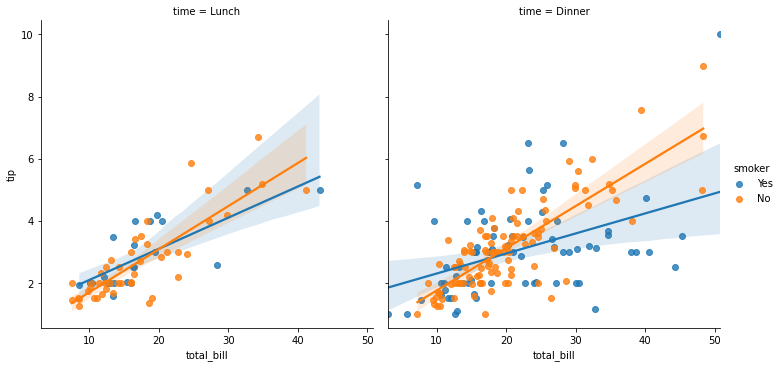

In [26]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker");

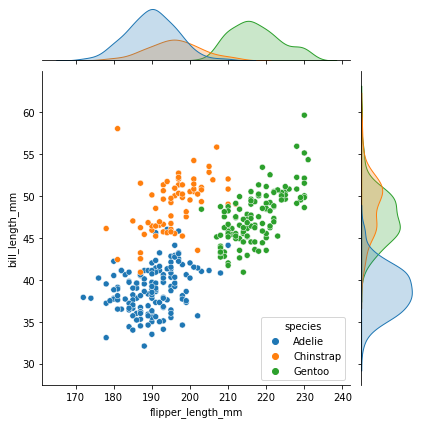

In [29]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [30]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


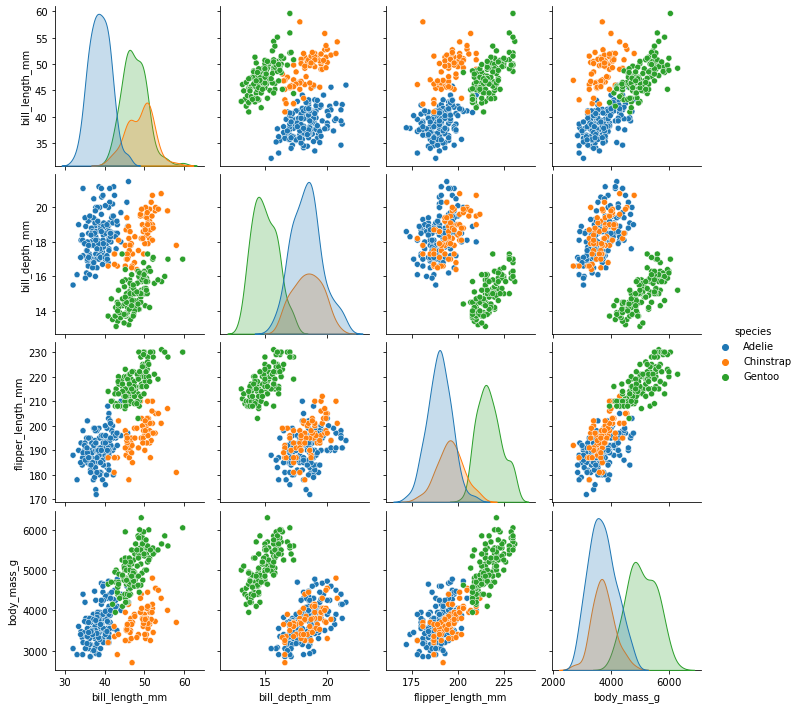

In [31]:
sns.pairplot(data=penguins, hue="species")

C:\Users\LENOVO\anaconda3\envs\python_foundation\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\LENOVO\anaconda3\envs\python_foundation\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\LENOVO\anaconda3\envs\python_foundation\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\Users\LENOVO\anaconda3\envs\python_found

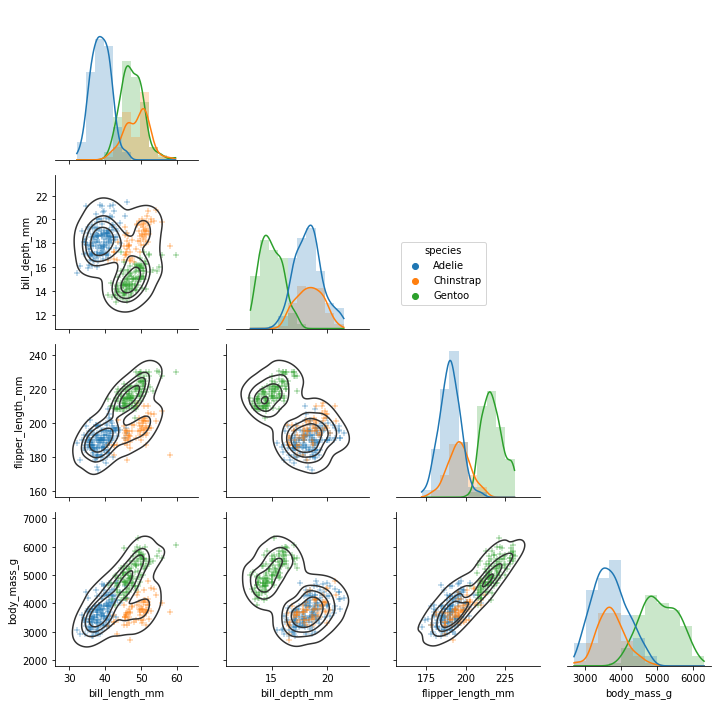

In [32]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [33]:
%pip list

Note: you may need to restart the kernel to use updated packages.Package                           Version
--------------------------------- -------------------
absl-py                           0.13.0
affine                            2.3.0

aiohttp                           3.7.4.post0
anyio                             3.2.0
appdirs                           1.4.4
argon2-cffi                       20.1.0
astor                             0.8.1
async-generator                   1.10
async-timeout                     3.0.1
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
bqplot                            0.12.29
branca                            0.4.2
brotlipy                          0.7.0
cached-property                   1.5.2
cachetools                        4.2.2
certifi                     

### Visualización de datos: Altair 🔜